In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("Data/fake reviews dataset.csv")

In [3]:
# Clean up the category names
old_cat = ['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5']
new_cat = ['Home and Kitchen', 'Sports and Outdoors', 'Electronics',
        'Movies and TV', 'Tools and Home Improvement',
        'Pet Supplies', 'Kindle Store', 'Books', 'Toys and Games',
        'Clothing Shoes and Jewelry']
df['category'].replace(to_replace=old_cat, value=new_cat, inplace=True)

# Remove any duplicate rows, then check for NA values for each column
df = df.drop_duplicates(subset='text_')
df['text_'].replace(".   .                   ", np.nan, inplace=True)
df.dropna(subset=['text_'], inplace=True)

print(df.isnull().sum())

# Rename columns so that they are more descriptive
colnames_dict = {"label": "type", "text_": "comments"}
df.rename(columns=colnames_dict, inplace=True)

# Map the type column to numeric/boolean values:
  # OR (Original reviews, presumably human-created and authentic) = 0
  # CG (Computer-generated fake reviews) = 1

type_dict_map = {'OR': 0 ,'CG':1}
df['type'] = df['type'].map(type_dict_map)
df.head()

category    0
rating      0
label       0
text_       0
dtype: int64


,category,rating,type,comments
0,Home and Kitchen,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home and Kitchen,5.0,1,"love it, a great upgrade from the original. I..."
2,Home and Kitchen,5.0,1,This pillow saved my back. I love the look and...
3,Home and Kitchen,1.0,1,"Missing information on how to use it, but it i..."
4,Home and Kitchen,5.0,1,Very nice set. Good quality. We have had the s...


In [ ]:
# Print the review counts for each types
type_counts = df['type'].value_counts()
print("Number of type 0 reviews:", type_counts[0])
print("Number of type 1 reviews:", type_counts[1])

#Numbers of review in each type
sns.countplot(data=df,x='type')
plt.title('Number of Type 0 and Type 1 Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Original Reviews', 'Computer-Generated Reviews'])
plt.show()

# Numbers of comment in each category
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Comments in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom')
plt.show()

#Proportions of different categories
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportions of different categories')
plt.ylabel('')
plt.show()

#Types of review in each category
plt.figure(figsize=(14, 8))
bars =sns.countplot(data=df, x='category', hue='type', palette='Set2')
plt.title('Number of Original and Computer-Generated Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Review Type', labels=['Original Reviews', 'Computer-Generated Reviews'])
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom')
plt.show()

#Rating distribution
hist=sns.histplot(data=df, x='rating', bins=5,)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
for p in hist.patches:
    hist.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom')
plt.show()

# the number of different types reviews by rating
review_counts = df.groupby(['rating', 'type']).size()
print(review_counts)

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Relationship Between Rating and Review Type')
plt.xlabel('Review Type')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Original Reviews', 'Computer-Generated Reviews'])

plt.show()


In [7]:
df['category'].unique()

array(['Home and Kitchen', 'Sports and Outdoors', 'Electronics',
       'Movies and TV', 'Tools and Home Improvement', 'Pet Supplies',
       'Kindle Store', 'Books', 'Toys and Games',
       'Clothing Shoes and Jewelry'], dtype=object)

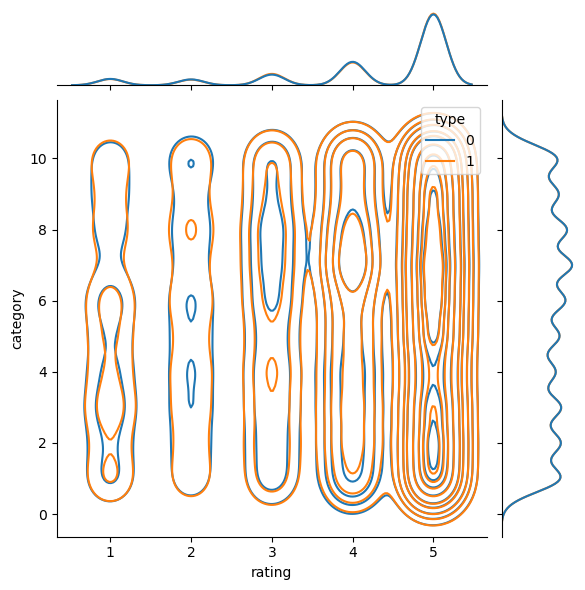

In [10]:
df2 = df
dict_map = {'Home and Kitchen': 1, 'Sports and Outdoors': 2, 'Electronics': 3,
       'Movies and TV': 4, 'Tools and Home Improvement': 5, 'Pet Supplies': 6,
       'Kindle Store': 7, 'Books': 8, 'Toys and Games': 9, 'Clothing Shoes and Jewelry': 10}
df2['category'] = df['category'].replace(dict_map) 

sns.jointplot(data=df2, x='rating', y='category', hue='type', kind='kde')

In [15]:

target_var  = 'type'
feature_var = [ 'rating', 'comments']
X = df[feature_var]
y = df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print("X_train shape:", X_train.shape)
print(X_train.head())
print("X_test shape:", X_test.shape)
print(X_test.head())
print("y_train shape:", y_train.shape)
print(y_train[:5])
print("y_test shape:", y_test.shape)
print(y_test[:5])

X_train shape: (28287, 2)
       rating                                           comments
7569      5.0  Great Cooler. Cheaper than other high end cool...
30086     4.0  Wow i can't believe Richards left me hanging n...
28669     2.0  Just didn't hold my interest. I finished it, b...
28491     4.0  it's a tough subject, this book has the potent...
3986      4.0  This is a decent storage rack. The only proble...
X_test shape: (12124, 2)
       rating                                           comments
27462     2.0  'Name that Doggy!' Because it was an easy read...
4476      5.0  These are good targets to add a bit of realism...
38652     5.0  I love this watch!  It has the wide band which...
11314     3.0  It does as advertised, mostly. It's on the bug...
21592     5.0  I have 2 boxers that I felt needed a little wa...
y_train shape: (28287, 1)
[[0]
 [0]
 [0]
 [1]
 [1]]
y_test shape: (12124, 1)
[[1]
 [0]
 [1]
 [0]
 [0]]


# Logistic Regression

In [ ]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Logistic Regression with 'comments' column, dflt solver (lbfgs)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline to vectorize the text data and then apply the logistic regression model
pipeline_log = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000)),
    ('logistic', LogisticRegression())
])

# Perform cross-validation and print the scores
cv_scores_log = cross_val_score(pipeline_log, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_scores_log)

# Fit pipeline to training data and make predictions
pipeline_log.fit(X_train['comments'], y_train.ravel())
predictions_log = pipeline_log.predict(X_test['comments'])

Cross-Validation Scores: [0.90261577 0.90509014 0.89711861 0.8934064  0.89676507]
Accuracy of logistic regression model: 0.8992081821181128
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6042
           1       0.91      0.88      0.90      6082

    accuracy                           0.90     12124
   macro avg       0.90      0.90      0.90     12124
weighted avg       0.90      0.90      0.90     12124

[[5530  512]
 [ 710 5372]]


In [ ]:
## Print model evaluation metrics
# Calculate accuracy
acc_log = metrics.accuracy_score(predictions_log, y_test.ravel())
print('Accuracy of logistic regression model:', acc_log)

# Print classification report and confusion matrix
confMatrix_log = metrics.confusion_matrix(y_test, predictions_log)
print(metrics.classification_report(y_test, predictions_log))
print(confMatrix_log)

Sensitivity [log reg model] :  0.9152598477325389
Specificity [log reg model] :  0.8832620848405129


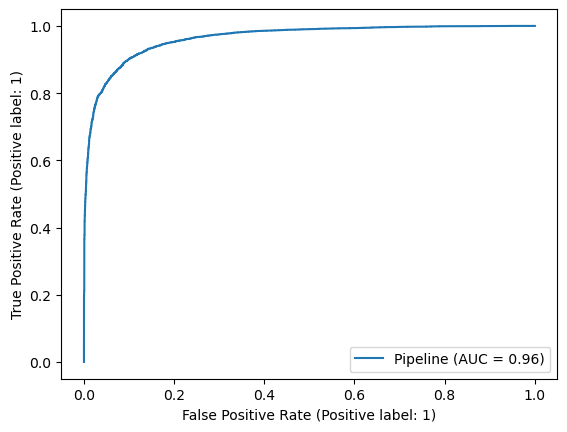

In [25]:
# sensitivity
sensitivity_log = confMatrix_log[0,0]/(confMatrix_log[0,0]+confMatrix_log[0,1])
print('Sensitivity [log reg model] : ', sensitivity_log)

# specificity
specificity_log = confMatrix_log[1,1]/(confMatrix_log[1,0]+confMatrix_log[1,1])
print('Specificity [log reg model] : ', specificity_log)

In [26]:
# Logistic Regression with 'comments' and 'rating' columns, solver = 'sag'
from sklearn.compose import ColumnTransformer

# Create a pipeline for TF-IDF vectorization of the 'comments' column
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000))
])

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_log = ColumnTransformer(
    transformers=[
        ('comments_tfidf', tfidf_pipeline, 'comments'),  # Apply TF-IDF to 'comments' column
        ('passthrough', 'passthrough', ['rating'])  # Pass through 'type' column as it is
    ],
    remainder='drop'  # Drop any columns not specified in the transformers
)

# Create the final pipeline by combining preprocessor and logistic regression
pipeline_log2 = Pipeline([
    ('preprocessor', preprocessor_log),
    ('logistic', LogisticRegression(solver='sag'))
])

# Perform cross-validation and print the scores
cv_scores_log2 = cross_val_score(pipeline_log2, X_train, y_train.ravel(), cv=5)
print("Cross-Validation Scores:", cv_scores_log2)

# Fit pipeline to training data and make predictions
pipeline_log2.fit(X_train, y_train.ravel())
predictions_log2 = pipeline_log2.predict(X_test)


Cross-Validation Scores: [0.90296925 0.90526688 0.89623475 0.89429026 0.89552766]


In [ ]:
## Print model evaluation metrics
# Calculate accuracy
acc_log2 = metrics.accuracy_score(predictions_log2, y_test.ravel())
print('Accuracy of logistic regression model:', acc_log2)

# Print classification report and confusion matrix
confMatrix_log2 = metrics.confusion_matrix(y_test, predictions_log2)
print(metrics.classification_report(y_test, predictions_log2))
print(confMatrix_log2)

# Multinomial Naive Bayes

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline to vectorize the text data and then apply the multinomial NB model
pipeline_multiNB = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000)),
    ('Multinomial NB', MultinomialNB())
])

# Perform cross-validation and print the scores
cv_score_multiNB = cross_val_score(pipeline_multiNB, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_score_multiNB)

# Fit pipeline to training data and make predictions
pipeline_multiNB.fit(X_train['comments'], y_train.ravel())
predictions_multiNB = pipeline_multiNB.predict(X_test['comments'])

# Print classification report and confusion matrix
confMatrix_mulitNB = confusion_matrix(y_test, predictions_multiNB)
print(classification_report(y_test, predictions_multiNB))
print(confMatrix_mulitNB)

# sensitivity
sensitivity_multiNB = confMatrix_mulitNB[0,0]/(confMatrix_mulitNB[0,0]+confMatrix_mulitNB[0,1])
print('Sensitivity [multi NB model] : ', sensitivity_multiNB)

# specificity
specificity_multiNB = confMatrix_mulitNB[1,1]/(confMatrix_mulitNB[1,0]+confMatrix_mulitNB[1,1])
print('Specificity [multi NB model] : ', specificity_multiNB)

In [ ]:
# Multinomial NB with 'comments' and 'rating' columns
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_log = ColumnTransformer(
    transformers=[
        ('comments_tfidf', tfidf_pipeline, 'comments'),  # Apply TF-IDF to 'comments' column
        ('passthrough', 'passthrough', ['rating'])  # Pass through 'type' column as it is
    ],
    remainder='drop'  # Drop any columns not specified in the transformers
)

# Create the final pipeline by combining preprocessor and multinomial NB
pipeline_multiNB2 = Pipeline([
    ('preprocessor', preprocessor_log),
    ('Multinomial NB', MultinomialNB())
])

# Perform cross-validation and print the scores
cv_scores_multiNB2 = cross_val_score(pipeline_multiNB2, X_train, y_train.ravel(), cv=5)
print("Cross-Validation Scores:", cv_scores_multiNB2)

# Fit pipeline to training data and make predictions
pipeline_multiNB2.fit(X_train, y_train.ravel())
predictions_multiNB2 = pipeline_multiNB2.predict(X_test)

# Print classification report and confusion matrix
confMatrix_multiNB2 = confusion_matrix(y_test, predictions_multiNB2)
print(classification_report(y_test, predictions_multiNB))
print(confMatrix_multiNB2)

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline to vectorize the text data and then apply the randomforest model
pipeline_rf = Pipeline([  
    ('tfidf', TfidfVectorizer(max_features=20000)),
    ('RandomForest', RandomForestClassifier())
])

# Perform cross-validation and print the scores
cv_score_rf = cross_val_score(pipeline_rf, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_score_rf)

# Fit pipeline to training data and make predictions
pipeline_rf.fit(X_train['comments'], y_train.ravel())
predictions_rf = pipeline_rf.predict(X_test['comments'])

# Print classification report and confusion matrix
confMatrix_rf = confusion_matrix(y_test, predictions_rf)
print(classification_report(y_test, predictions_rf))
print(confMatrix_rf)

# sensitivity
sensitivity_rf = confMatrix_rf[0,0]/(confMatrix_rf[0,0]+confMatrix_rf[0,1])
print('Sensitivity [Random forest model] : ', confMatrix_rf)

# specificity
specificity_rf = confMatrix_rf[1,1]/(confMatrix_rf[1,0]+confMatrix_rf[1,1])
print('Specificity [Random forest model] : ', specificity_rf)

Cross-Validation Scores: [0.88105338 0.88193708 0.88085558 0.878204   0.88668906]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6042
           1       0.88      0.89      0.89      6082

    accuracy                           0.89     12124
   macro avg       0.89      0.89      0.89     12124
weighted avg       0.89      0.89      0.89     12124

[[5312  730]
 [ 641 5441]]
Sensitivity [Random forest model] :  [[5312  730]
 [ 641 5441]]
Specificity [Random forest model] :  0.8946070371588294


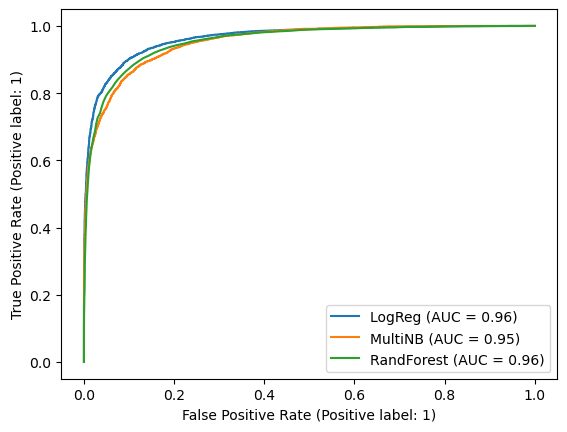

In [31]:
# Comparing ROC curves of log reg with multi NB
logDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_log, X_test['comments'], y_test.ravel(), name='LogReg')
multiNBDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_multiNB, X_test['comments'], y_test.ravel(), ax=logDisplay.ax_, name='MultiNB')
rfDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_rf, X_test['comments'], y_test.ravel(), ax=logDisplay.ax_, name='RandForest')

In [ ]:
from sklearn.metrics import accuracy_score

# Ask for user input
rating = int(input("Enter the rating (1-5): "))
comment = input("Enter the comment: ")

# Create a DataFrame with the user input
user_data = pd.DataFrame({'rating': [rating],
                          'comments': [comment]})

# Transform the user input using the TF-IDF vectorizer
user_data_tfidf = pipeline.named_steps['tfidf'].transform(user_data['comments'])

# Predict the output using the trained classifier
prediction = pipeline.named_steps['classifier'].predict(user_data_tfidf.toarray())

# Calculate accuracy if actual output is available
# OR (Original reviews, presumably human-created and authentic) = 0
# CG (Computer-generated fake reviews) = 1
actual_output = 0  
accuracy = accuracy_score([actual_output], prediction)
# Print the prediction and accuracy
if prediction[0] == 0:
    print("Original review (OR)")
else:
    print("Computer-generated fake review (CG)")

print("Prediction Accuracy:", accuracy)

<br>
<br>
<br>
<br>
<br>
Below are backup code that didn't really work


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Define the pipeline
pipeline_nb = Pipeline([
    # Remove the max_features limitation at the end.
    ('tfidf', TfidfVectorizer(max_features=20000)),  # TF-IDF vectorizer
    ('classifier', GaussianNB())    # Gaussian Naive Bayes classifier
])

# Transform comment to tfidf
X_train_tfidf = pipeline_nb.named_steps['tfidf'].fit_transform(X_train['comments'])
X_test_tfidf = pipeline_nb.named_steps['tfidf'].fit_transform(X_test['comments'])

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Cross validation
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
rkfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
model = GaussianNB()

grid_nb = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=1)

# Fit the function to train set 
grid_nb.fit(X_train_tfidf, y_train)

# Find the best parameter and see how well it performs on test set
print(grid_nb.best_params_)
print(grid_nb.score(X_test_tfidf, y_test))
print(grid_nb.cv_results_['mean_test_score'])


# Below are code for validation
# print('kFold accuracy scores are', cross_val_score(pipeline_nb.named_steps['classifier'], X_train_tfidf, y_train, scoring='precision', cv= kfold, n_jobs=-1))
# print('repeated kFold accuracy scores are', cross_val_score(pipeline_nb.named_steps['classifier'], X_train_tfidf, y_train, scoring='precision', cv= rkfold, n_jobs=-1))

# print('The average KFold scores is', np.mean(cross_val_score(pipeline.named_steps['classifier'], X_train_tfidf, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)))
# print('The average RepeatedKFold score is', np.mean(cross_val_score(pipeline.named_steps['classifier'], X_train_tfidf, y_train, cv=rkfold, n_jobs=-1)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the pipeline
pipeline_nb = Pipeline([
    # Remove the max_features limitation at the end.
    ('tfidf', TfidfVectorizer(max_features=20000)),  # TF-IDF vectorizer
    ('classifier', GaussianNB(var_smoothing=0.002))    # Gaussian Naive Bayes classifier
])
# Transform comment to tfidf
X_train_tfidf = pipeline_nb.named_steps['tfidf'].fit_transform(X_train['comments'])
X_test_tfidf = pipeline_nb.named_steps['tfidf'].fit_transform(X_test['comments'])

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

model_nb = pipeline_nb.named_steps['classifier'].fit(X_train_tfidf, y_train.ravel())

# Evaluate the model
train_accuracy = pipeline_nb.named_steps['classifier'].score(X_train_tfidf, y_train)
test_accuracy = pipeline_nb.named_steps['classifier'].score(X_test_tfidf, y_test)

feature_names =  pipeline_nb.named_steps['tfidf'].get_feature_names_out()
num_features = len(feature_names)

print("Number of features (vocabulary size):", num_features)
print("This accuracy score shows")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

predict_nb = model_nb.predict(X_test_tfidf)

acc = accuracy_score(predict_nb, y_test)
precision = precision_score(predict_nb, y_test)
recall = recall_score(predict_nb, y_test)
f1 = f1_score(predict_nb, y_test)

print('The accuracy score of NB is', acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
#Transform each comment row into tfidf array
df['comments'] = df['comments'].astype(str)

vectorizer = TfidfVectorizer()
# print(df['comments'])
for index, row in df.iterrows():
    # Transform the comment into a TF-IDF array
    comment = row['comments']
    # Check if the comment is empty or contains only stop words
    

    # Transform the comment into a TF-IDF array
    comment_tfidf = vectorizer.fit_transform([comment]).toarray()
    # Replace the original comment with its TF-IDF array
    df.at[index, 'comments'] = comment_tfidf

# response = vectorizer.fit_transform(df['comments'])
# df['comments'] = response.getnnz()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Initialize the Naive Bayes classifier
model = GaussianNB()
print("error1")
# Train the classifier
model.fit(X_train, y_train)
print("error2")

# Predictions on the training set
train_preds = model.predict(X_train)
print("error3")

# Predictions on the testing set
test_preds = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
